<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AEyCD---Grupo-9/blob/main/Entregable_parte_1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for decouple: filename=decouple-0.0.7-py3-none-any.whl size=4483 sha256=e87211021b969140a9cf6a09439dc1f96970748d5048613410f324511c14eed9
  Stored in directory: /root/.cache/pip/wheels/c0/f8/ba/513f9e16fec0df6b2dfd693ae2c057773e912c478b6019f24f
Successfully built decouple


In [3]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn as sns
sns.set_context('talk')


import config
from sqlalchemy import create_engine, text

In [7]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [8]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [125]:
melb_df.CouncilArea.value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



**1- Creación de base de datos:**

In [9]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

**2- Creación de tablas:**

In [10]:
melb_df.to_sql('Melbo', con=engine, if_exists="replace")

2022-05-24 18:57:52,579 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbo")
2022-05-24 18:57:52,581 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:57:52,583 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melbo")
2022-05-24 18:57:52,586 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:57:52,596 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-24 18:57:52,601 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbo" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-24 18:57:52,611 INFO sqlalchemy.engine.Engine [no key 0.00985s] ()
2022-05-24 18:57:52,625 INFO sqlalchemy.engi

In [11]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
airbnb_df.city.value_counts()

Melbourne            7368
Port Phillip         2808
Yarra                2049
Stonnington          1621
Moreland              967
Yarra Ranges          771
Darebin               698
Boroondara            664
Glen Eira             631
Whitehorse            614
Monash                571
Maribyrnong           436
Wyndham               426
Bayside               375
Moonee Valley         344
Manningham            313
Kingston              309
Hobsons Bay           239
Banyule               203
Frankston             177
Knox                  175
Hume                  170
Casey                 153
Greater Dandenong     147
Whittlesea            137
Cardinia              123
Maroondah             115
Brimbank              108
Melton                 95
Nillumbik              88
Name: city, dtype: int64

In [12]:
airbnb_df.to_sql('Airbnb', con=engine, if_exists="replace")

2022-05-24 18:58:02,389 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-05-24 18:58:02,392 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:58:02,396 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Airbnb")
2022-05-24 18:58:02,399 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:58:02,406 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-24 18:58:02,410 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Airbnb" (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-05-24 18:58:02,413 INFO sqlalchemy.engine.Engine [no key 0.00309s] ()
2022-05-24 18:58:02,425 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Airbnb_index" ON "Airbnb" ("index")
2022-05-24 18:58:02,429 INFO sqlalchemy.engine.Engine [no key 0.00338s] ()
2022-05-24 18:58:02,445

**A traves de "to_numeric" llevamos todos los registros al mismo tipo de datos**

In [13]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [14]:
airbnb_df.zipcode.value_counts().head(10)

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
3121.0     628
3008.0     616
3053.0     538
3181.0     460
3056.0     446
Name: zipcode, dtype: int64

**3. Consultas SQL:**

**Cantidad de registros totales por ciudad:**


(Guardamos strings en variables y luego pandas lo convierte en una sentencia sql)

In [15]:
query1 = "SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc"
query2 = "SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city"

In [16]:
with engine.connect() as con:
      rs = con.execute(query1)
      print(query1)
      for row in rs:
          print(row)

2022-05-24 18:58:04,739 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc
2022-05-24 18:58:04,746 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc
('Melbourne', 7368)
('Port Phillip', 2808)
('Yarra', 2049)
('Stonnington', 1621)
('Moreland', 967)
('Yarra Ranges', 771)
('Darebin', 698)
('Boroondara', 664)
('Glen Eira', 631)
('Whitehorse', 614)
('Monash', 571)
('Maribyrnong', 436)
('Wyndham', 426)
('Bayside', 375)
('Moonee Valley', 344)
('Manningham', 313)
('Kingston', 309)
('Hobsons Bay', 239)
('Banyule', 203)
('Frankston', 177)
('Knox', 175)
('Hume', 170)
('Casey', 153)
('Greater Dandenong', 147)
('Whittlesea', 137)
('Cardinia', 123)
('Maroondah', 115)
('Brimbank', 108)
('Melton', 95)
('Nillumbik', 88)


In [17]:

with engine.connect() as con:
      rs = con.execute(query2)
      print(query2)
      for row in rs:
          print(row)

2022-05-24 18:58:04,865 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city
2022-05-24 18:58:04,871 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city
('Banyule', None, 174)
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Bayside', None, 170)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Brighton', 203)
('Bayside', 'Elwood', 1)
('Boroondara', None, 30)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Malvern', 2)
('Brimbank', None, 108)
('Cardinia', None, 123)
('Casey', None, 153)
('Darebin', None, 112)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', 'Northcote', 

**Cantidad de registros totales por barrio y ciudad:**

**4.JOIN de Datasets por SQL:**

Controlamos de que tengamos suficientes registros en común como para agregar información relevante a traves del JOIN por Código Postal.

In [18]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


Calculamos el porentaje de el total de registros de Postcode o Zipcode que interaccionan (cruzan) entre los distintos Dataset respecto el total de registros.

In [19]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Definimos columnas de interes del Dataset de Airbnb y calculamos ciertas métricas de los registros agrupados por Zipcode.

In [20]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

In [21]:
airbnb_price_by_zipcode.head()

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN


In [22]:
airbnb_price_by_zipcode.to_sql('Metrica', con=engine, if_exists="replace")

2022-05-24 18:58:05,213 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Metrica")
2022-05-24 18:58:05,243 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:58:05,248 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Metrica")
2022-05-24 18:58:05,252 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-24 18:58:05,259 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-24 18:58:05,264 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Metrica" (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-05-24 18:58:05,272 INFO sqlalchemy.engine.Engine [no key 0.00739s] ()
2022-05-24 18:58:05,297 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Metrica_index" ON "Metrica" ("index")
2022-05-24 18:58:05,299 INFO sqlalchemy.engine.Engine [no key 0.00154s] ()
2022-05-24 18:58:05,315 INFO sqlalchemy.engine.Engine COMMIT
2022-05-24 18:58:05,319 INFO sqlalchemy.engine.Engine BE

Generamos y ejecutamos la sentencia de SQL para unir mediante LEFT JOIN las tablas "Melbo" y "Métricas" (generada a partir del Dataset de Airbnb.

Primeramente ejecutamos un conteo de registros del Leftjoin (Desde tabla Melbo) para comparar y controlar la cantidad de registros de la tabla resultante:

In [23]:
query3 = "SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode"

In [24]:
with engine.connect() as con:
      rs = con.execute(query3)
      print(query3)
      for row in rs:
          print(row)

2022-05-24 18:58:05,387 INFO sqlalchemy.engine.Engine SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode
2022-05-24 18:58:05,396 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode
(13580,)


In [25]:
len(melb_df)

13580

In [26]:
query4 = "SELECT * FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode"

In [27]:
# with engine.connect() as con:
#     rs = con.execute(query4)
#     print(query4)
#     for row in rs:
#        print(row)

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

**1. Selección del subconjunto de variables relevantes:**

 **Variables:**

- Suburb: region 

- Address: property address 

- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area


**Descartamos las siguientes variables, incluso antes de analizarlas,  por no considerarlas relevantes al problema planteado :**

- Regionname
- Propertycount
- Address
- Postcode
- Lattitude
- Longtitude
- CouncilArea


In [28]:
#Analisis de los tipos de variables del Dataset y visualización de valores faltantes
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [112]:
#Analizamos la existencia de ceros en nuestras variables:
cols = melb_df[melb_df == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

In [113]:
pandas.options.display.float_format = '{:.2f}'.format

In [114]:
melb_df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


**Price**

<Figure size 1440x720 with 0 Axes>

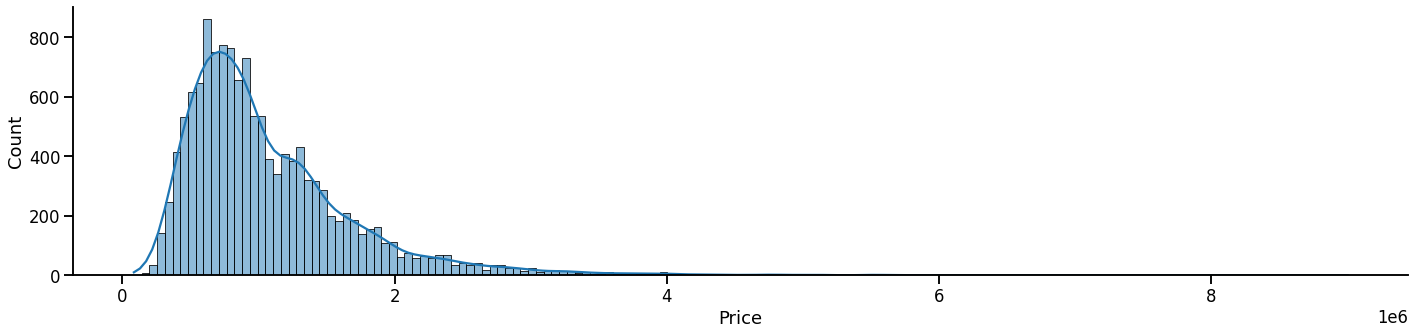

In [32]:
#Distribución del precio de las propiedades en el Dataset
plt.figure(figsize=(20, 10))
sns.displot(melb_df['Price'], aspect=4, kde=True)

**Suburb**

In [87]:
#Conteo de frecuencias de Suburb en el Dataframe
Suburb_df = (pandas.value_counts(melb_df['Suburb'])).reset_index().rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
print(Suburb_df)
Conteo = len(melb_df['Suburb'])
print('Total de registros para Suburb:', Conteo)

             Suburb  frequency
0         Reservoir        359
1          Richmond        260
2    Bentleigh East        249
3           Preston        239
4         Brunswick        222
..              ...        ...
309       Sandhurst          1
310    Bullengarook          1
311   Croydon South          1
312        Montrose          1
313         Monbulk          1

[314 rows x 2 columns]
Total de registros para Suburb: 13580


In [97]:
# Si consideramos relevante la variable Suburbios, podemos filtrar el Dataframe por los que tengan frecuencia mayor a 30 y tener muestras representativas por Suburb
Suburb_list = Suburb_df[Suburb_df['frequency']>30].set_index("Suburb").index.to_numpy().tolist()
#Suburbios = list(Suburb_list['Suburb'])
Suburb_df2 = melb_df[melb_df.Suburb.isin(Suburb_list)]
Suburb_df2.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


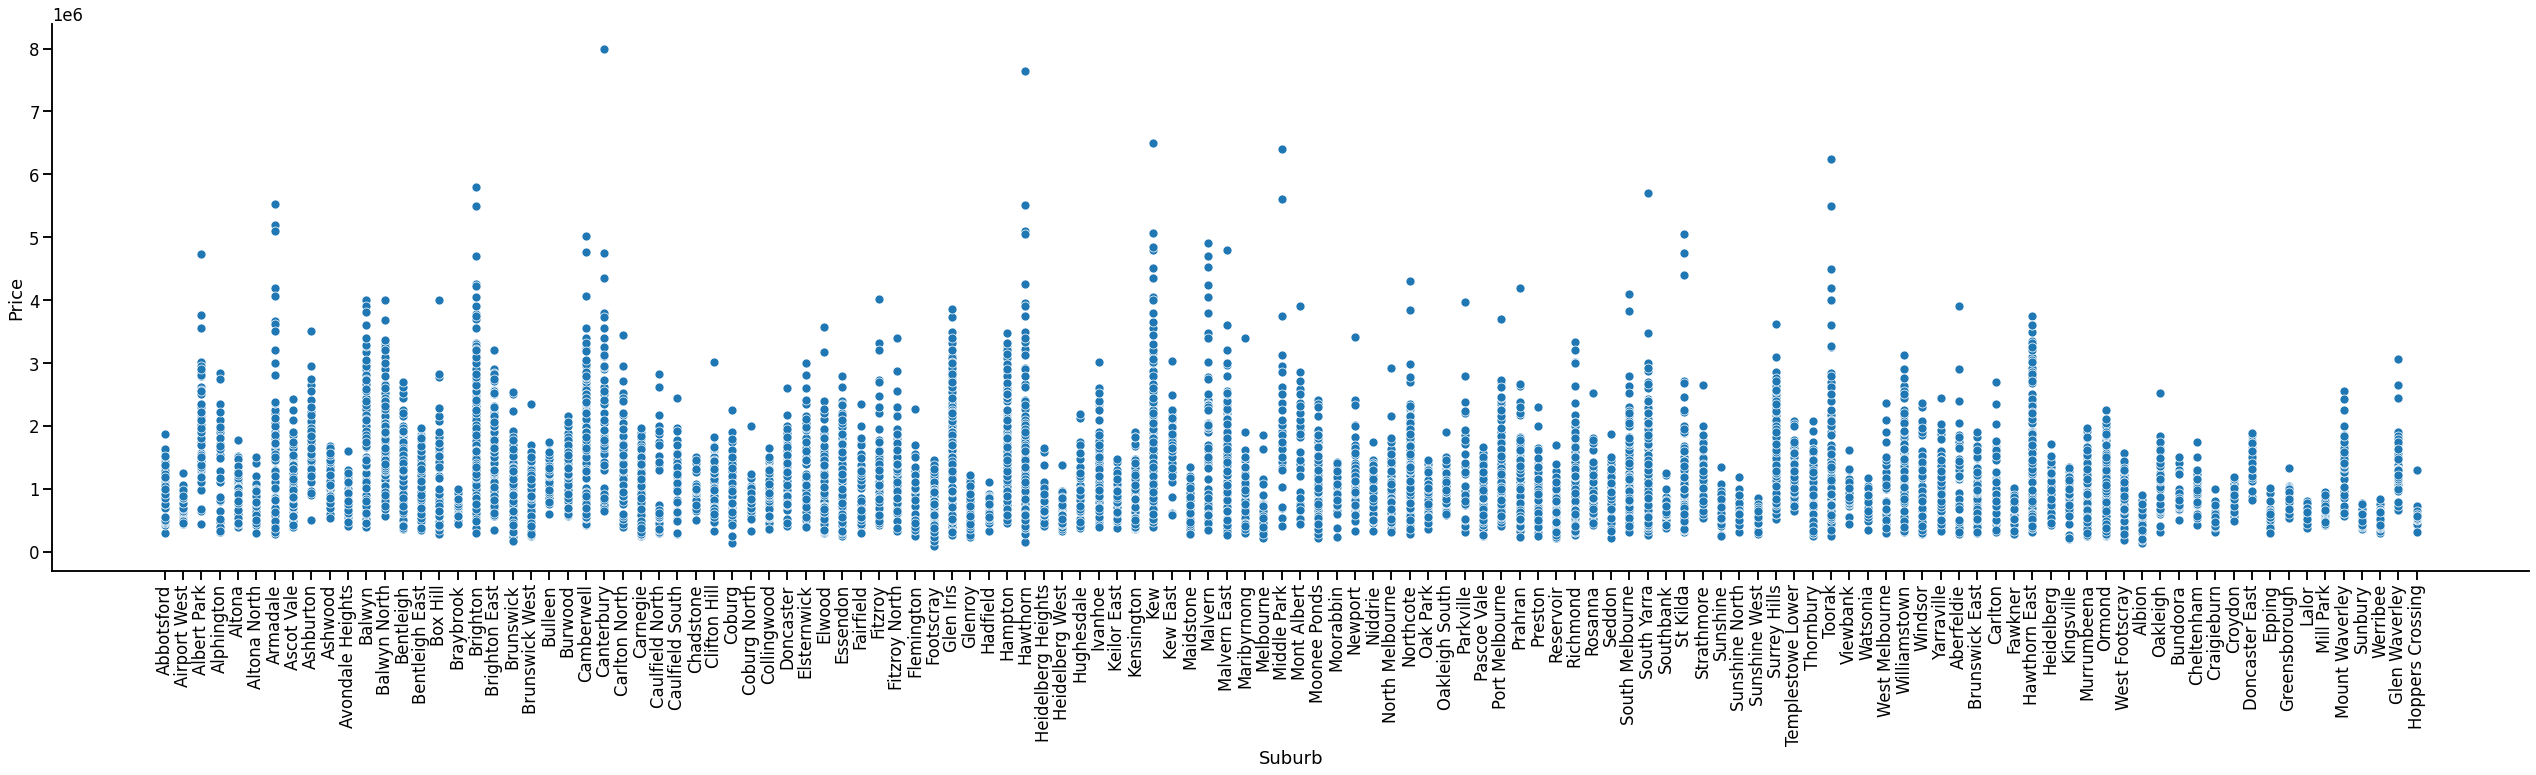

In [133]:
#Relación Precio - Suburbios
grid = sns.pairplot(data=Suburb_df2, y_vars=['Price'],
                 x_vars=['Suburb'],
                 aspect=4, height=9)
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

**Type**

In [98]:
print(pandas.value_counts(melb_df['Type']))
Conteo = len(melb_df['Type'])
print('Total de registros para Type:', Conteo)

h    9449
u    3017
t    1114
Name: Type, dtype: int64
Total de registros para Type: 13580


**Rooms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


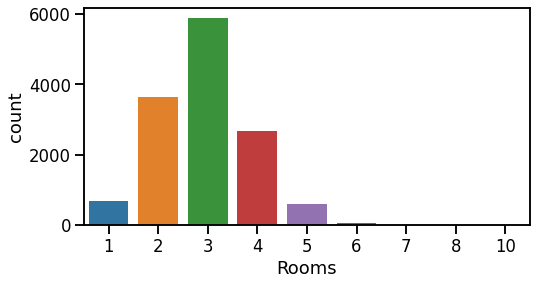

In [99]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Rooms)
plt.xticks(rotation=0)
plt.show()

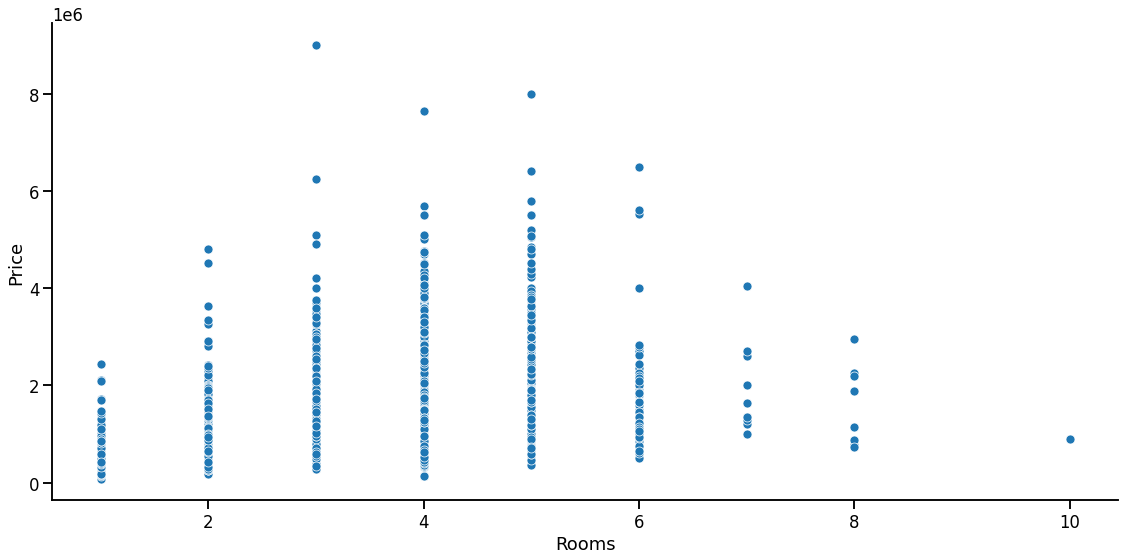

In [120]:
#Relación Precio - Habitaciones
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Rooms'],
                 aspect=2, height=8)

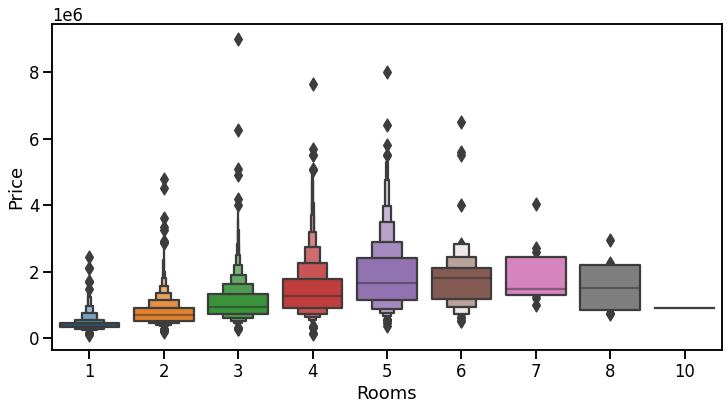

In [101]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=melb_df, x='Rooms', y='Price')

**Method**

In [102]:
print(pandas.value_counts(melb_df['Method']))
Conteo = len(melb_df['Method'])
print('Total de registros para Method:', Conteo)

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64
Total de registros para Method: 13580


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


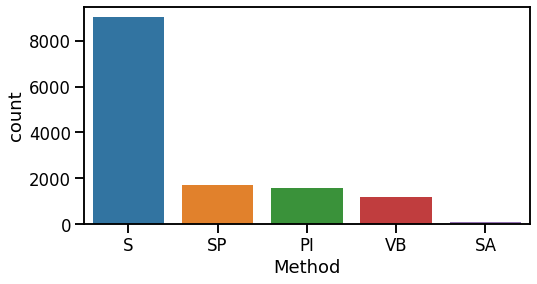

In [104]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Method)
plt.xticks(rotation=0)
plt.show()

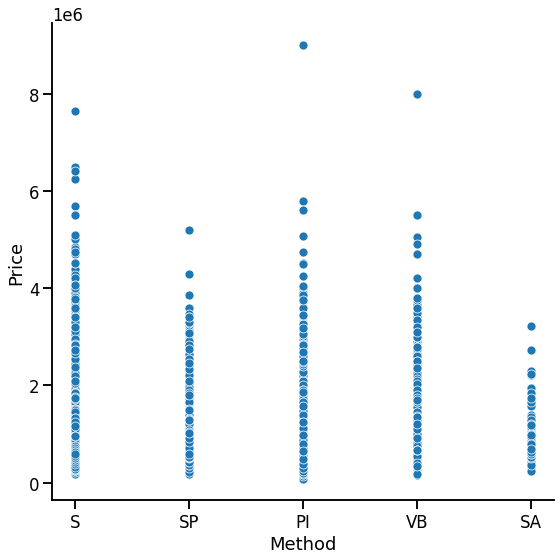

In [111]:
#Relación Precio - Metodo
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Method'],
                 aspect=1, height=8)

**SellerG**

In [103]:
print(pandas.value_counts(melb_df['SellerG']))
Conteo = len(melb_df['SellerG'])
print('Total de registros para SellerG:', Conteo)

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64
Total de registros para SellerG: 13580


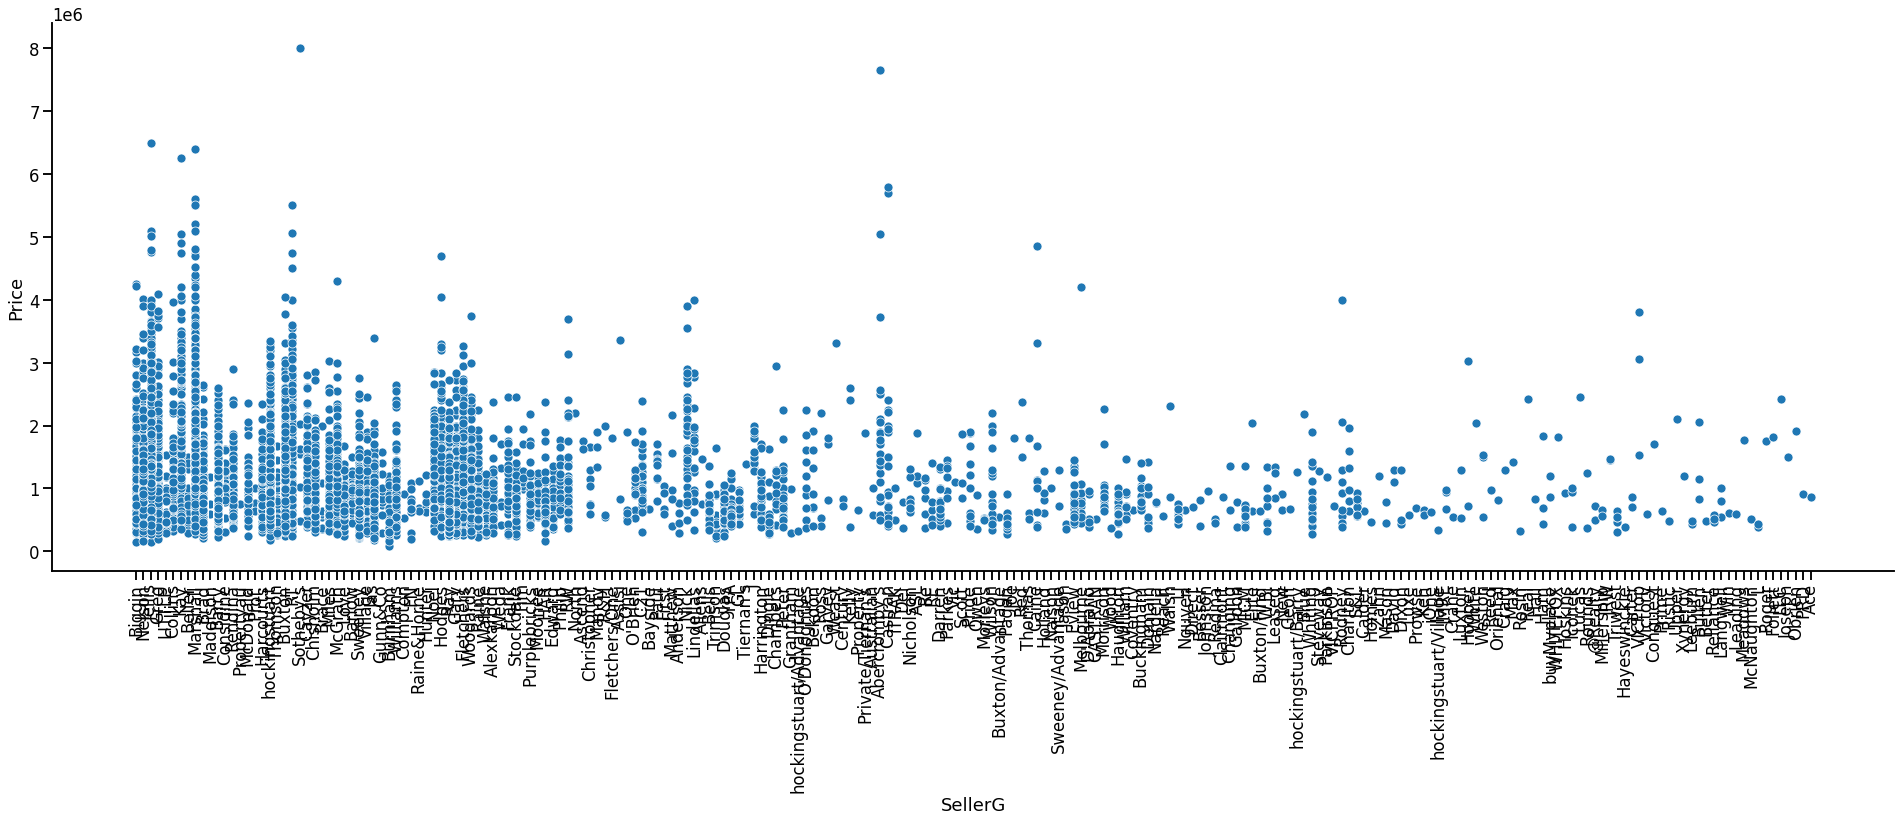

In [134]:
#Relación Precio - Vendedor
grid = sns.pairplot(data=Suburb_df2, y_vars=['Price'],
                 x_vars=['SellerG'],
                 aspect=3, height=9)
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

**Distance**

<Figure size 1440x720 with 0 Axes>

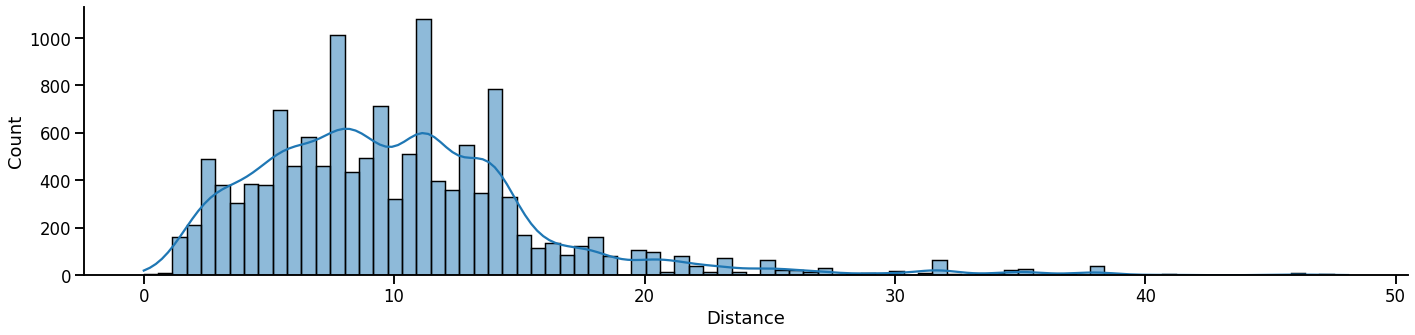

In [115]:
#Distribución de la distancia de las propiedades en el Dataset
plt.figure(figsize=(20, 10))
sns.displot(melb_df['Distance'], aspect=4, kde=True)

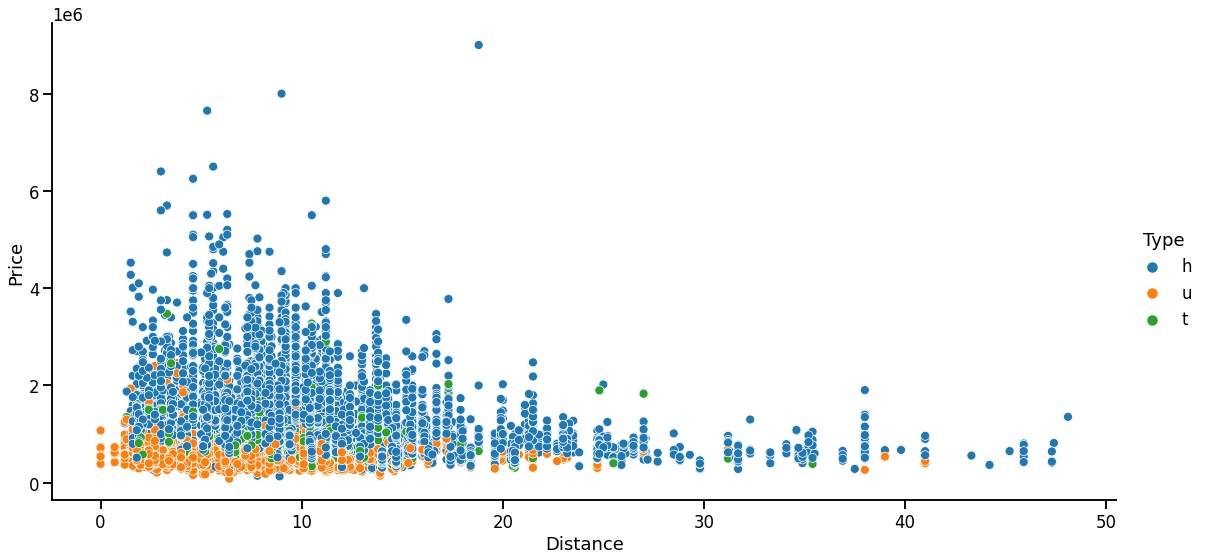

In [118]:
##Relación Precio - Distancia (Con aclaracion del tipo de vivienda)
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Distance'],hue='Type',
                 aspect=2, height=8)

**2. Se agrega información del conjunto de datos de Airbnb:**

In [ ]:
merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
10056,Strathmore,140 Woodland St,3,h,1650000.00,S,Trimson,24/06/2017,8.20,3041.00,...,Moonee Valley,-37.74,144.92,Western Metropolitan,3284.00,3041.00,106.12,8.00,350.00,1500.00
12534,Keilor Downs,2 Ajax Cl,4,h,720000.00,S,Brad,9/09/2017,15.50,3038.00,...,NaN,-37.72,144.79,Western Metropolitan,3656.00,3038.00,91.00,8.00,600.00,NaN


Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
#merged_sales_df.to_csv("melb_data_extended.csv", index=None)

In [ ]:
#from google.colab import files
#files.download('melb_data_extended.csv') 

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)